# Ejemplo utilizando datos sintéticos numéricos y el clasificador GaussianNB de scikit-learn.

Generaremos dos conjuntos de datos normales, uno para cada clase, y luego se combinan para formar un conjunto de datos más grande.

Se utiliza el clasificador GaussianNB para predecir las etiquetas de las clases. La precisión del modelo y el informe de clasificación se imprimen al final.

Este es un ejemplo simple pero ilustrativo de cómo aplicar el clasificador Naive Bayes a datos numéricos sintéticos.

# 1. Generamos los datos sintéticos

Creamos dos arrays bidimensionales:

- En el primero los datos seguirán una distribución normal de media 0 y desviación estándar 1. Representarán a la clase 0.
- En el segundo los datos seguirán una distribución normal de media 3 y desviación estándar 1. Representarán a la clase 1.

In [1]:
import numpy as np

np.random.seed(41)

# Clase 0
class_0_data = np.random.normal(0, 1, size=(100, 2))
class_0_labels = np.zeros(100)

# Clase 1
class_1_data = np.random.normal(3, 1, size=(100, 2))
class_1_labels = np.ones(100)

# 2. Visualizamos los datos

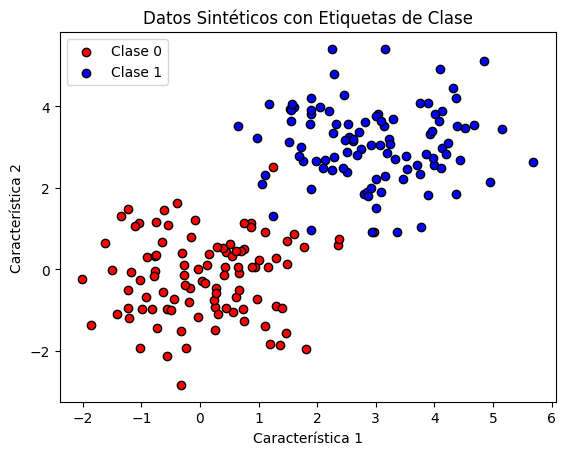

In [ ]:
import matplotlib.pyplot as plt

COLORS = ('red', 'blue')

for i, data in enumerate((class_0_data, class_1_data)):
    plt.scatter(data[:, 0], data[:, 1], c=COLORS[i], edgecolor='k', label=f"Clase {i}")

plt.title('Datos Sintéticos con Etiquetas de Clase')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.show()

# 3. Mezclamos los datos y creamos conjunto de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split

# Combinar datos de ambas clases
X = np.vstack((class_0_data, class_1_data))
y = np.concatenate((class_0_labels, class_1_labels))

# Dividir el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Creamos el modelo y lo entrenamos

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# 5. Realizamos predicción y evaluamos

Para evaluar usaremos el **informe de clasificación** que proporciona un resumen detallado del rendimiento de un modelo de clasificación en términos de diversas métricas:

- **Precisión** (*Precision*): proporción de instancias clasificadas como positivas que son realmente positivas. Se calcula como TP/(TP+FP), donde TP es el número de verdaderos positivos y FP es el número de falsos positivos.

- **Recuperación** (*Recall* o *Sensibilidad*): proporción de instancias positivas que fueron correctamente identificadas por el modelo. Se calcula como TP/(TP+FN), donde FN es el número de falsos negativos.

- **Puntuación F1** (*F1 Score*): media armónica de precisión y recuperación. Proporciona un equilibrio entre ambas métricas. Se calcula como 2×Precision×Recall/(Precision+Recall).

- **Soporte** (*Support*): El soporte es el número total de instancias en cada clase.

- **Exactitud** (*Accuracy*): La exactitud es la proporción de instancias clasificadas correctamente (tanto positivas como negativas) entre el total de instancias. Se calcula como (TP+TN)/(TP+TN+FP+FN), donde TN es el número de verdaderos negativos.

Estas métricas son útiles para evaluar el rendimiento del modelo desde diferentes perspectivas. Dependiendo del problema, algunas métricas pueden ser más importantes que otras. Por ejemplo, en problemas de desequilibrio de clases, la precisión y la recuperación pueden ser más relevantes que la exactitud. Es importante considerar el contexto del problema al interpretar el informe de clasificación.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1']))


Precisión del modelo: 0.975

Informe de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.95      1.00      0.98        21
     Clase 1       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



# 6. Matriz de confusión

La matriz de confusión es otra herramienta útil para evaluar el rendimiento de un modelo de clasificación. Muestra el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN). Se puede obtener y mostrar la matriz de confusión utilizando la función `confusion_matrix` de `scikit-learn`.

Utilizamos `sns.heatmap` de la biblioteca `seaborn` para visualizarla con un mapa de calor para hacerla más fácil de interpretar, donde las celdas coloreadas indican el número de predicciones correctas e incorrectas para cada clase. La intensidad del color refleja la magnitud de esos valores.

Los parámetros utilizado en `sns.heatmap` son:

- `cm`: La matriz de confusión.
- `annot=True`: Muestra los valores reales en cada celda.
- `cmap='Blues'`: Selecciona el esquema de colores "Blues" (va de tonos más claros a más oscuros)
- `xticklabels` y `yticklabels`: Etiquetas de los ejes x e y ('Clase 0' y 'Clase 1').
- `plt.title, plt.xlabel, plt.ylabel`: Establecen el título y las etiquetas de los ejes para el mapa de calor.

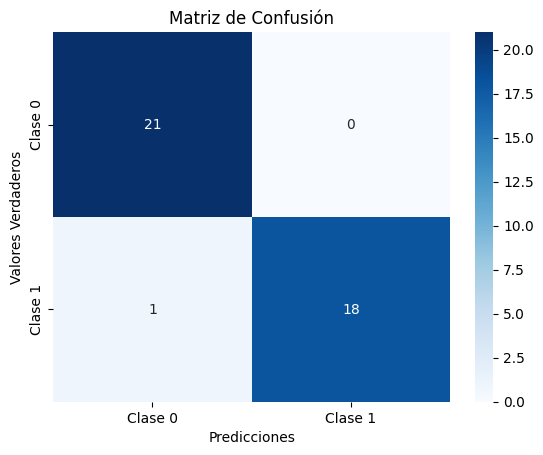

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

classes = ('Clase 0', 'Clase 1')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()